In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [4]:
#select stocks to compaer
stocks = ["GME","AMC"]

In [5]:
#grab stock data from yahoo
data = yf.download(stocks, start='2021-02-01',end='2022-02-01')

[*********************100%***********************]  2 of 2 completed


In [6]:
#preview the data
data.head()

Adj Close              Close               High                Low  \
                 AMC         GME    AMC         GME    AMC         GME    AMC   
Date                                                                            
2021-02-01     13.30  225.000000  13.30  225.000000  17.25  322.000000  12.91   
2021-02-02      7.82   90.000000   7.82   90.000000  10.10  158.000000   6.00   
2021-02-03      8.97   92.410004   8.97   92.410004   9.77  113.400002   7.89   
2021-02-04      7.09   53.500000   7.09   53.500000   8.74   91.500000   7.00   
2021-02-05      6.83   63.770000   6.83   63.770000   8.27   95.000000   6.52   

                         Open                 Volume            
                   GME    AMC         GME        AMC       GME  
Date                                                            
2021-02-01  212.000000  17.00  316.559998  434608000  37382200  
2021-02-02   74.220001   9.48  140.759995  462775900  78183100  
2021-02-03   85.250000   8.85  112.010002  221405100  42698500  
2021-02-04   53.330002   8.70   91.190002  162985800  62427300  
2021-02-05   51.090000   7.17   54.040001  197097600  81345000

In [7]:
#grab the closed column from the dataframe
closedStocks = data.loc[:,"Close"].copy()

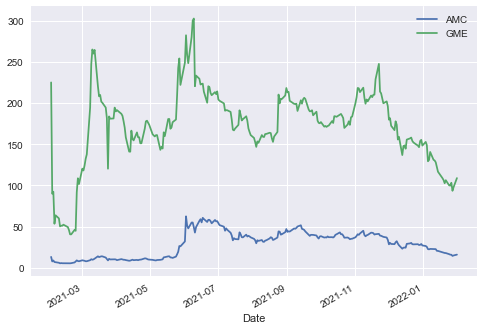

In [12]:
#chart without normilization
closedStocks.plot()
plt.style.use("seaborn")
plt.show()

In [13]:
#normalize the data
norm = closedStocks.div(closedStocks.iloc[0]).mul(100)

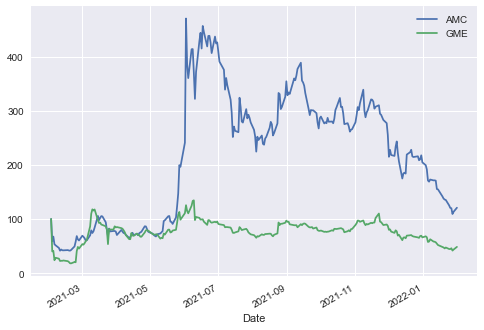

In [14]:
norm.plot()
plt.style.use("seaborn")
plt.show()

In [ ]:
#risk analysis
stock = ["GME","AMC","AAPL"]
stocks = yf.download(stock, start='2016-02-01',end='2022-02-01')

In [18]:
#daily percent change per stock
data = stocks.loc[:,"Close"].copy()
data.pct_change()

,AAPL,AMC,GME
Date,,,
2016-02-01,NaN,NaN,NaN
2016-02-02,-0.020222,-0.022045,-0.033197
2016-02-03,0.019792,0.008633,0.009645
2016-02-04,0.002595,0.027580,0.032098
2016-02-05,-0.026708,-0.062008,-0.006664
...,...,...,...
2022-01-25,-0.011385,-0.037260,-0.003595
2022-01-26,-0.000563,-0.004994,0.034773
2022-01-27,-0.002943,-0.089084,-0.094325


In [19]:
#clean data of nan
com = data.pct_change().dropna()
com.describe()

,AAPL,AMC,GME
count,1511.000000,1511.000000,1511.000000
mean,0.001482,0.002841,0.003660
std,0.018429,0.100606,0.080460
min,-0.128647,-0.566332,-0.600000
25%,-0.006496,-0.021775,-0.018834
50%,0.001000,-0.001616,-0.000351
75%,0.010233,0.017495,0.017289
max,0.119808,3.012097,1.348358


In [20]:
#grab the mean and standard deviation
sum = com.describe().T.loc[:,["mean","std"]]
sum

,mean,std
AAPL,0.001482,0.018429
AMC,0.002841,0.100606
GME,0.003660,0.080460


In [21]:
#determine the yearly ranges for mean and std
sum["mean"] = sum["mean"]*252
sum["std"] = sum["std"] * np.sqrt(252)

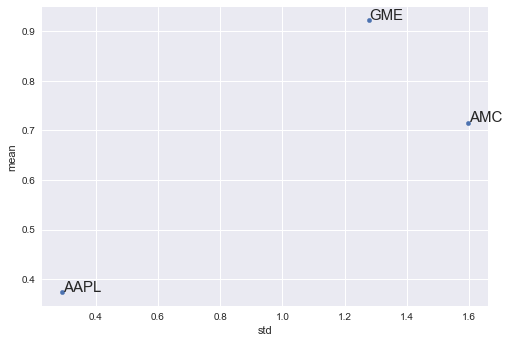

In [23]:
sum.plot.scatter(x="std",y="mean")
for i in sum.index:
    plt.annotate(i, xy=(sum.loc[i,"std"]+0.002, sum.loc[i,"mean"]+0.002), size=15)